In [1]:
import networkx as nx
import pandas as pd

from karateclub.dataset import GraphReader

# NetworkX

## a

0.0


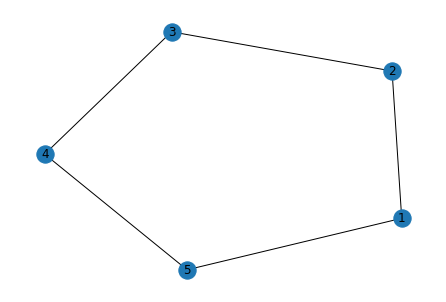

In [2]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)])
average_clustering_coff = nx.average_clustering(G)
print(average_clustering_coff)
nx.draw(G, with_labels=True)

## b

4.0


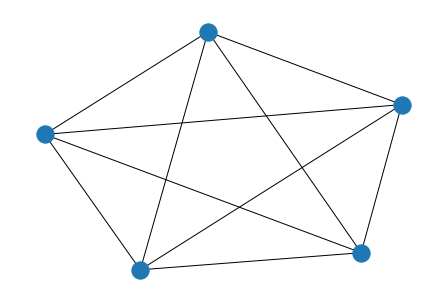

In [3]:
K_5 = nx.complete_graph(5)
average_degree = K_5.number_of_edges() * 2 / K_5.number_of_nodes()
print(average_degree)
nx.draw(K_5, with_labels=False)

## c

In [4]:
DG = nx.DiGraph()
node_data = pd.read_csv('./elliptic_txs_edgelist.csv')
for row_index in range(len(node_data)):
    DG.add_edges_from([(node_data['txId1'][row_index], node_data['txId2'][row_index])])

In [5]:
print('Total number of nodes: {}'.format(DG.number_of_nodes()))
print('Total number of edges: {}'.format(DG.number_of_edges()))
print('Total number of weakly connected components {}'.format(nx.number_weakly_connected_components(DG)))

Total number of nodes: 203769
Total number of edges: 234355
Total number of weakly connected components 49


In [6]:
nx.weakly_connected_components(DG)

<generator object weakly_connected_components at 0x7fc13a9f2c80>

In [7]:
top_3 = sorted(nx.weakly_connected_components(DG), key=len)

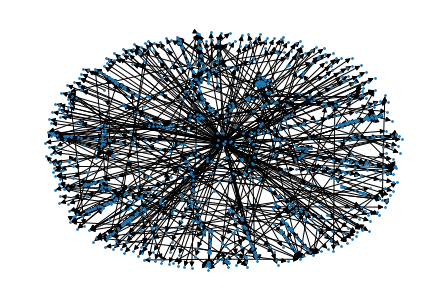

In [8]:
sub = nx.subgraph(DG, list(top_3[0]))
nx.draw(sub, with_labels=False, node_size=3)

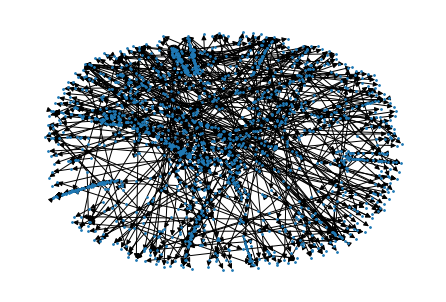

In [9]:
sub = nx.subgraph(DG, list(top_3[1]))
nx.draw(sub, with_labels=False, node_size=3)

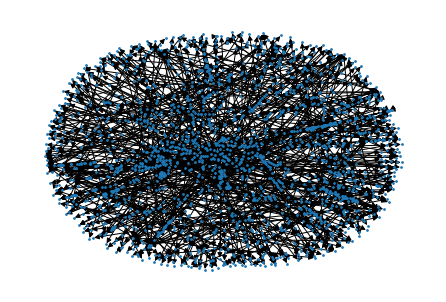

In [10]:
sub = nx.subgraph(DG, list(top_3[2]))
nx.draw(sub, with_labels=False, node_size=3)

# Karate Club

In [11]:
from karateclub.dataset import GraphReader

reader = GraphReader("facebook")

graph = reader.get_graph()
y = reader.get_target()

In [12]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=16)
model.fit(graph)
X = model.get_embedding()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict(X_test)
balance_acc = balanced_accuracy_score(y_test, y_hat)
print('B_ACC: {:.4f}'.format(balance_acc))

B_ACC: 0.5519
